# Book Recommendation System

## Team no :12
### Team Members
- Bhargav Hegde (PES2UG20CS087)
- Chandan MS (PES2UG20CS094)
- Darshan GA (PES2UG20CS101)
- Chandan BS(PES2UG20CS093)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Data

Initially we tried using the dataset from bookcrossing.com and dropped it for its issues.

Currently we are using the goodreads dataset from [here](https://github.com/zygmuntz/goodbooks-10k)


In [2]:
ratings = pd.read_csv('ratings.csv')
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
835091,9090,9083,4
835092,9090,2320,4
835093,9090,557,4
835094,12996,421,4


In [3]:
books = pd.read_csv('books.csv')
books = books.filter(['book_id','title'])

books2 = pd.read_csv('books1.csv')
books2 = books2.filter(['image_url','genres'])
books2 = books2.rename(columns={'image_url': 'book_id'})
books2

,book_id,genres
0,https://images.gr-assets.com/books/1447303603l...,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,https://images.gr-assets.com/books/1255614970l...,Fantasy|Young Adult|Fiction
2,https://images.gr-assets.com/books/1361975680l...,Classics|Fiction|Historical|Historical Fiction...
3,https://images.gr-assets.com/books/1320399351l...,Classics|Fiction|Romance
4,https://images.gr-assets.com/books/1361039443l...,Young Adult|Fantasy|Romance|Paranormal|Vampire...
...,...,...
54296,https://images.gr-assets.com/books/1312074392l...,Sports|Baseball|Sports and Games|Sports|Nonfic...
54297,https://images.gr-assets.com/books/1348841629l...,Nonfiction|Sports and Games|Sports
54298,https://images.gr-assets.com/books/1394277097l...,Sports|Baseball|Abandoned
54299,https://images.gr-assets.com/books/1403192135l...,Nonfiction|Autobiography|Memoir|Biography|Psyc...


In [4]:
def fun(x):
    import os
    temp = os.path.basename(str(x)).replace(".jpg", "")
    return temp
    

books2['book_id'] = books2['book_id'].apply(fun)
books2


,book_id,genres
0,2767052,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,2,Fantasy|Young Adult|Fiction
2,2657,Classics|Fiction|Historical|Historical Fiction...
3,1885,Classics|Fiction|Romance
4,41865,Young Adult|Fantasy|Romance|Paranormal|Vampire...
...,...,...
54296,10520617,Sports|Baseball|Sports and Games|Sports|Nonfic...
54297,4860405,Nonfiction|Sports and Games|Sports
54298,13243154,Sports|Baseball|Abandoned
54299,22318477,Nonfiction|Autobiography|Memoir|Biography|Psyc...


In [5]:
books2[books2['book_id'].isna()]
books2['book_id'] = pd.to_numeric(books2['book_id'], errors='coerce')
books_genres = books.merge(books2, on='book_id')
books2


,book_id,genres
0,2767052.0,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,2.0,Fantasy|Young Adult|Fiction
2,2657.0,Classics|Fiction|Historical|Historical Fiction...
3,1885.0,Classics|Fiction|Romance
4,41865.0,Young Adult|Fantasy|Romance|Paranormal|Vampire...
...,...,...
54296,10520617.0,Sports|Baseball|Sports and Games|Sports|Nonfic...
54297,4860405.0,Nonfiction|Sports and Games|Sports
54298,13243154.0,Sports|Baseball|Abandoned
54299,22318477.0,Nonfiction|Autobiography|Memoir|Biography|Psyc...


In [6]:
books_genres = books_genres.dropna()
books_genres.reset_index(drop=True)
books_genres

,book_id,title,genres
0,1,"The Hunger Games (The Hunger Games, #1)",Fantasy|Young Adult|Fiction
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,Fantasy|Young Adult|Fiction
2,3,"Twilight (Twilight, #1)",Fantasy|Young Adult|Fiction
3,5,The Great Gatsby,Fantasy|Young Adult|Fiction
4,6,The Fault in Our Stars,Fantasy|Young Adult|Fiction
...,...,...,...
1249,9943,Sherlock Holmes and the Case of the Hound of t...,Christian Fiction|Christian|Fiction|Romance|Co...
1250,9957,"Inside of a Dog: What Dogs See, Smell, and Know",Fiction|Contemporary|European Literature|Briti...
1251,9958,The Pacific,Fiction|Short Stories|Fantasy|Childrens
1252,9998,The Mauritius Command,Fiction|Cultural|Japan|Asian Literature|Japane...


### Step 3: Exploratory Data Analysis

In [7]:
LIMIT = 500000
ratings = ratings.iloc[:LIMIT]

In [8]:
n_ratings = len(ratings)
n_books = ratings['book_id'].nunique()
n_users = ratings['user_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique bookId's: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per book: {round(n_ratings/n_books, 2)}")

Number of ratings: 500000
Number of unique bookId's: 6575
Number of unique users: 6923
Average number of ratings per user: 72.22
Average number of ratings per book: 76.05


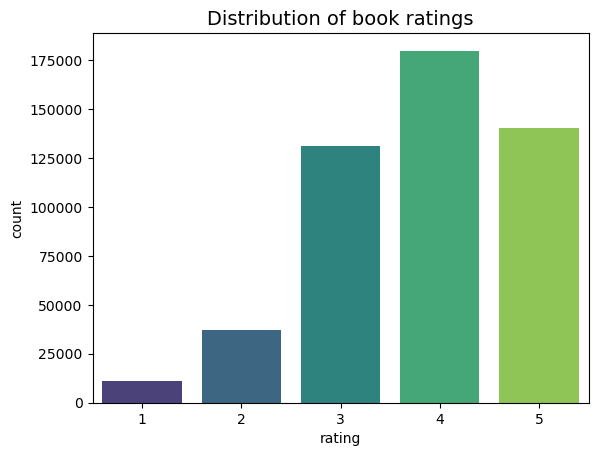

In [9]:
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of book ratings", fontsize=14)
plt.show()

In [10]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

mean_ratings = ratings.groupby('user_id')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.8.
Mean rating per user: 3.82.


#### Best vs. Worst book

Which book has the lowest and highest average rating?

In [11]:
mean_ratings = ratings.groupby('book_id')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
books[books['book_id'] == lowest_rated]


,book_id,title
3408,3409,The Winner Stands Alone


`The Winner Stands Alone` has the lowest average rating.

In [12]:
highest_rated = mean_ratings['rating'].idxmax()
books[books['book_id']== highest_rated]

,book_id,title
223,224,"Fallen (Fallen, #1)"


The Complete Calvin and Hobbes may be the "highest" rated book, but it might be a FP. A better approach for evaluating book popularity is to look at the [Bayesian average](https://en.wikipedia.org/wiki/Bayesian_average).

#### Bayesian Average

Bayesian Average is defined as:

$r_{i} = \frac{C \times m + \Sigma{\text{reviews}}}{C+N}$

where $C$ represents our confidence, $m$ represents our prior, and $N$ is the total number of reviews for book $i$. In this case, our prior will be the average rating across all books. By defintion, C represents "the typical data set size". Let's make $C$ be the average number of ratings for a given book.

In [13]:
book_stats = ratings.groupby('book_id')[['rating']].agg(['count', 'mean'])
book_stats.columns = book_stats.columns.droplevel()

In [14]:
C = book_stats['count'].mean()
m = book_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('book_id')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['book_id', 'bayesian_avg']
book_stats = book_stats.merge(bayesian_avg_ratings, on='book_id')

In [15]:
book_stats = book_stats.merge(books[['book_id', 'title']])
book_stats.sort_values('bayesian_avg', ascending=False).head()

,book_id,count,mean,bayesian_avg,title
1047,1338,219,4.639269,4.430588,The Book of Mormon: Another Testament of Jesus...
92,102,806,4.467742,4.412726,Where the Wild Things Are
21,25,2186,4.415828,4.396121,Harry Potter and the Deathly Hallows (Harry Po...
0,1,292,4.496575,4.358768,"The Hunger Games (The Hunger Games, #1)"
353,422,146,4.623288,4.351473,"Harry Potter Boxset (Harry Potter, #1-7)"


Using the Bayesian average, we see that `Harry Potter and the Deathly Hallows `, `Harry Potter Boxset`, and `Words of Radiance ` are the most highly rated books. This result makes much more sense since these books are critically acclaimed.

In [16]:
book_stats.sort_values('bayesian_avg', ascending=True).head()

,book_id,count,mean,bayesian_avg,title
2875,4009,107,2.289720,2.929464,Four Blondes
1614,2136,203,2.605911,2.939396,The Jane Austen Book Club
1192,1547,309,2.737864,2.953483,The Mermaid Chair
1525,2015,236,2.805085,3.054763,The Bridges of Madison County
2553,3550,105,2.504762,3.061248,The Almost Moon


With Bayesian averaging, it looks like `Fifty Shades of Grey`, `Twilight`, and `New Moon` are the worst rated books. `The Complete Calvin and Hobbes` isn't so bad after all.

#### A Glimpse at Book Genres

The books dataset needs to be cleaned in two ways:

- `genres` is expressed as a string with a pipe `|` separating each genre. We will manipulate this string into a list, which will make it much easier to analyze.

In [17]:
books_genres['genres'] = books_genres['genres'].apply(lambda x: x.split("|"))
books_genres.head()

,book_id,title,genres
0,1,"The Hunger Games (The Hunger Games, #1)","[Fantasy, Young Adult, Fiction]"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,"[Fantasy, Young Adult, Fiction]"
2,3,"Twilight (Twilight, #1)","[Fantasy, Young Adult, Fiction]"
3,5,The Great Gatsby,"[Fantasy, Young Adult, Fiction]"
4,6,The Fault in Our Stars,"[Fantasy, Young Adult, Fiction]"


**How many book genres are there?**

In [18]:
from collections import Counter

genre_frequency = Counter(g for genres in books_genres['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 331 genres.


Counter({'Fantasy': 262,
         'Young Adult': 139,
         'Fiction': 900,
         'Magic': 7,
         'Science Fiction': 149,
         'Humor': 113,
         'Classics': 412,
         'Nonfiction': 299,
         'Science': 86,
         'History': 100,
         'Travel': 33,
         'Cultural': 164,
         'Africa': 25,
         'Autobiography': 113,
         'Memoir': 95,
         'Australia': 6,
         'Writing': 56,
         'Essays': 43,
         'European Literature': 71,
         'British Literature': 28,
         'Humanities': 7,
         'Language': 12,
         'Linguistics': 2,
         'Adventure': 55,
         'Survival': 4,
         'Childrens': 139,
         'Urban Fantasy': 7,
         'Paranormal': 31,
         'Fairies': 2,
         'Middle Grade': 11,
         'Romance': 114,
         'Mythology': 16,
         'Mermaids': 1,
         'Historical': 317,
         'Historical Fiction': 228,
         'African American': 4,
         'Geology': 1,
         'Envir

In [19]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Fiction', 900), ('Classics', 412), ('Literature', 339), ('Historical', 317), ('Nonfiction', 299)]


### Step 4: Data Pre-processing

We are going to use a technique called colaborative filtering to generate recommendations for users. This technique is based on the premise that similar people like similar things. 

The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent books. The beauty of collaborative filtering is that it doesn't require any information about the users or the books user to generate recommendations.

<img src="imgs/user-book-matrix.png" width=60%/>

The `create_X()` function outputs a sparse matrix X with four mapper dictionaries:

- **user_mapper**: maps user id to user index
- **book_mapper**: maps book id to book index
- **user_inv_mapper**: maps user index to user id
- **book_inv_mapper**: maps book index to book id

We need these dictionaries because they map which row/column of the utility matrix corresponds to which user/book id.

Our X (user-item) matrix is a [scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) which stores the data sparsely.

In [20]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (user_id, book_id, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        book_mapper: dict that maps book id's to book indices
        book_inv_mapper: dict that maps book indices to book id's
    """
    M = df['user_id'].nunique()
    N = df['book_id'].nunique()

    user_mapper = dict(zip(np.unique(df['user_id']), list(range(M))))
    book_mapper = dict(zip(np.unique(df['book_id']), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["user_id"])))
    book_inv_mapper = dict(zip(list(range(N)), np.unique(df["book_id"])))
    
    user_index = [user_mapper[i] for i in df['user_id']]
    item_index = [book_mapper[i] for i in df['book_id']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_X(ratings)

In [21]:
X

<6923x6575 sparse matrix of type '<class 'numpy.int64'>'
	with 500000 stored elements in Compressed Sparse Row format>

#### Evaluating sparsity

Here, we calculate sparsity by dividing the number of empty elements by total number of elements. The number of stored (non-empty) elements in our matrix is equivalent to the number of ratings in our dataset.

In [22]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round((1-sparsity)*100,2)}%")

Matrix sparsity: 98.9%


`csr_matrix.nnz` counts the stored values in our sparse matrix. The rest of our cells are empty.

The **cold start problem** is when there are new users and books in our matrix that do not have any ratings. In our Goodreads dataset, all users and books have at least one rating but in general, it's useful to check which users and books have few interactions.

In [23]:
n_ratings_per_user = X.getnnz(axis=1)

print(f"Most active user rated {n_ratings_per_user.max()}  books.")
print(f"Least active user rated {n_ratings_per_user.min()} books.")

Most active user rated 193  books.
Least active user rated 1 books.


In [24]:
n_ratings_per_book = X.getnnz(axis=0)

print(f"Most rated book has {n_ratings_per_book.max()} ratings.")
print(f"Least rated book has {n_ratings_per_book.min()} ratings.")

Most rated book has 2563 ratings.
Least rated book has 1 ratings.


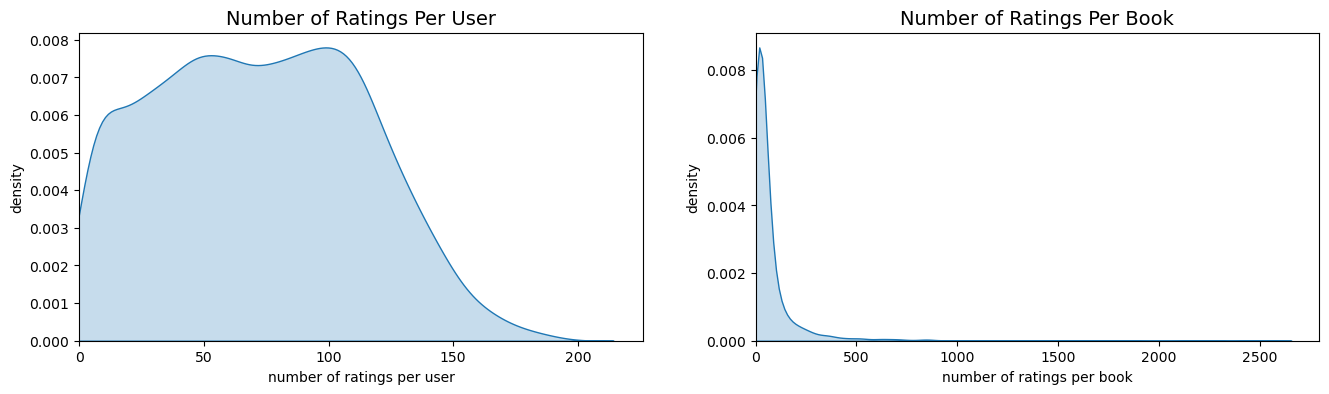

In [25]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_book, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Book", fontsize=14)
plt.xlabel("number of ratings per book")
plt.ylabel("density")
plt.show()

#### Normalizing our data

User-item bias is defined as: $b_{ui} = \mu + b_{u} + b_{i}$

We will perform mean normalization by subtracting $b_{i}$ from each book's rating.

In [26]:
sum_ratings_per_book = X.sum(axis=0)
mean_rating_per_book = sum_ratings_per_book/n_ratings_per_book

Now that we have the mean rating for each book, we are going to subtract this from our utility matrix. In order to do this, we need to expand our 1D `mean_rating_per_book` array into a matrix with the same shape as our utility matrix `(n_users, n_books)`. Numpy's `tile` method is useful for this task.

In [27]:
X_mean_book = np.tile(mean_rating_per_book, (X.shape[0],1))

In [28]:
X_mean_book.shape

(6923, 6575)

`X_mean_book` is a matrix of shape (n_users, n_books) in which each column is populated with a given book's mean rating.

We can easily normalize our X matrix by subtracting `X_mean_book` from original `X`.

In [29]:
X_norm = X - csr_matrix(X_mean_book)

As expected, `X_norm`'s values are different from `X`s. Cells that are empty in the original matrix are now replaced with negative values representing the mean rating of a given book. 

In [30]:
print("Original X:", X[0].todense())
print("Normalized X:", X_norm[0].todense())

Original X: [[0 0 0 ... 0 0 0]]
Normalized X: [[-4.49657534 -4.0956486  -3.61711712 ... -4.         -3.93333333
  -4.        ]]


### Step 5: Item-item Recommendations with k-Nearest Neighbors

We are going to find the $k$ books that have the most similar user engagement vectors for book $i$.

In [31]:
from sklearn.neighbors import NearestNeighbors

def find_similar_books(book_id, X, book_mapper, book_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given book id.
    
    Args:
        book_id: id of the book of interest
        X: user-item utility matrix
        k: number of similar books to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar book ID's
    """
    X = X.T
    neighbour_ids = []
    
    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    if isinstance(book_vec, (np.ndarray)):
        book_vec = book_vec.reshape(1,-1)  # we need one roe and full columns
    # use k+1 since kNN output includes the book_id of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)  #default =minkowski
    kNN.fit(X)
    neighbour = kNN.kneighbors(book_vec, return_distance=False)
    for i in range(0,k):  
        n = neighbour.item(i)    
        neighbour_ids.append(book_inv_mapper[n])  #appends the book id from the index
    neighbour_ids.pop(0)  # its the same items
    return neighbour_ids

`find_similar_books()` takes in a `book_id` and `X` matrix, and outputs a list of $k$ books that are similar to the `book_id` of interest.

Let's see it in action. We will first create another mapper that maps book_id to title so that our results are interpretable.

In [32]:
similar_books = find_similar_books(2, X_norm, book_mapper, book_inv_mapper, k=10)
similar_books

[18, 24, 23, 21, 27, 25, 53, 1286, 6133]

`find_similar_books()` returns a list of `book`'s that are most similar to your book of interest. Let's convert these id's to titles so that we can interpret our results. To make things easier, we will create a dictionary that maps `book_id` to `title`.

In [33]:
book_titles = dict(zip(books['book_id'], books['title']))
book_id = 2

similar_books = find_similar_books(book_id, X_norm, book_mapper, book_inv_mapper, metric='cosine', k=10)
book_title = book_titles[book_id]

print(f"Because you read {book_title}:")
for i in similar_books:
    print(book_titles[i])

Because you read Harry Potter and the Sorcerer's Stone (Harry Potter, #1):
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Harry Potter and the Order of the Phoenix (Harry Potter, #5)
Harry Potter and the Half-Blood Prince (Harry Potter, #6)
Harry Potter and the Deathly Hallows (Harry Potter, #7)
Eragon (The Inheritance Cycle, #1)
Quidditch Through the Ages
The Reality Bug (Pendragon, #4)


The results above show the 10 books that are most similar to Harry Potter and the Sorcerer's Stone. Most books in this list are Harry Potter, which seems pretty reasonable. Note that these recommendations are based solely on user-item ratings. Book features such as genres are not used in this approach.

We can also play around with the kNN distance metric and see what results you would get if you use "manhattan" or "euclidean" instead of "cosine".

In [34]:
book_titles = dict(zip(books['book_id'], books['title']))
book_id = 2

similar_books = find_similar_books(book_id, X_norm, book_mapper, book_inv_mapper, metric='euclidean', k=10)
book_title = book_titles[book_id]

print(f"Because you read {book_title}:")
for i in similar_books:
    print(book_titles[i])

Because you read Harry Potter and the Sorcerer's Stone (Harry Potter, #1):
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
Harry Potter and the Chamber of Secrets (Harry Potter, #2)
Harry Potter and the Goblet of Fire (Harry Potter, #4)
Harry Potter and the Order of the Phoenix (Harry Potter, #5)
Harry Potter and the Half-Blood Prince (Harry Potter, #6)
Harry Potter and the Deathly Hallows (Harry Potter, #7)
Claimed By Shadow (Cassandra Palmer, #2)
Lies Women Believe: And the Truth that Sets Them Free
1/4 جرام


## Step 6: Collaborative filtering .
### solution to the cold start problem.



Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the **cold start problem**. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

First, we need to convert the `genres` column into binary features. Each genre will have its own column in the dataframe, and will be populated with 0 or 1.

In [35]:
n_books = books['book_id'].nunique()
print(f"There are {n_books} unique books in our books dataset.")

There are 10000 unique books in our books dataset.


In [47]:
genres = set(g for G in books_genres['genres'] for g in G)

for g in genres:
    books_genres[g] = books_genres.genres.transform(lambda x: int(g in x))
    
book_genres = books_genres.drop(columns=['book_id', 'title','genres'])

In [37]:
book_genres.head()

,Relationships,Classics,Fairy Tales,Urban Fantasy,Detective,Comedy,French Literature,Computer Science,Feminism,Sports and Games,...,Biology,Environment,Academia,Personal Finance,Graphic Novels Comics,Astronomy,Survival,Manga,19th Century,Africa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(book_genres, book_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (1253, 1253)


The dimensions of our cosine similarity matrix are $M \times M$ where $M$ represents the total number of books.

In [39]:
def book_finder(title):
    return books_genres[books_genres['title'].str.contains(title)]['title'].tolist()

book_finder('Harry Potter')

["Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)',
 'Harry Potter and the Goblet of Fire (Harry Potter, #4)',
 'Harry Potter and the Deathly Hallows (Harry Potter, #7)',
 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)',
 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)']

In [40]:
book_idx = dict(zip(books_genres['title'], list(books_genres.index)))
title = book_finder('Twilight')[0]
n_recommendations = 10

idx = book_idx[title]
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_books = [i[0] for i in sim_scores]

print(f"Recommendations for {title}:")
books['title'].iloc[similar_books]

Recommendations for Twilight (Twilight, #1):


1      Harry Potter and the Sorcerer's Stone (Harry P...
2                                Twilight (Twilight, #1)
3                                  To Kill a Mockingbird
4                                       The Great Gatsby
242                                               Misery
5                                 The Fault in Our Stars
6                                             The Hobbit
22     Harry Potter and the Chamber of Secrets (Harry...
342                                     The Runaway Jury
389          The Strange Case of Dr. Jekyll and Mr. Hyde
Name: title, dtype: object

With this approach, we are assuming that two books are "similar" if they have similar genres. These "similar book" recommendations are based solely on the metadata from our books dataset. 

### Dimensionality Reduction with Matrix Factorization

Matrix factorization (MF) is a linear algebra technique that can help us discover latent features underlying the interactions between users and books. These latent features give a more compact representation of user tastes and item descriptions. MF is particularly useful for very sparse data and can enhance the quality of recommendations. The algorithm works by factorizing the original user-item matrix into two factor matrices:

- user-factor matrix (n_users, k)
- item-factor matrix (k, n_items)

We are reducing the dimensions of our original matrix into "taste" dimensions. We cannot interpret what each latent feature $k$ represents. However, we could imagine that one latent feature may represent users who like shakespearan classics, while another latent feature may represent books which are engineering related.

$$A_{mn}\approx U_{mk}\times V{nk}^T = \hat{X} $$
<img src="imgs/matrix-factorization.png" width="50%"/>

In [41]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)
print(X.T.shape)

Z = svd.fit_transform(X.T) #book factor matrix
print(Z.shape)

(6575, 6923)
(6575, 20)


In [42]:
book_id = 37
similar_books = find_similar_books(book_id, Z.T, book_mapper, book_inv_mapper, metric='cosine', k=10)
book_title = book_titles[book_id]

print(f"Because you read {book_title}:")
for i in similar_books:
    print(book_titles[i])

Because you read The Lion, the Witch, and the Wardrobe (Chronicles of Narnia, #1):
Prince Caspian (Chronicles of Narnia, #2)
The Magician's Nephew (Chronicles of Narnia, #6)
The Chronicles of Narnia (Chronicles of Narnia, #1-7)
The Horse and His Boy (Chronicles of Narnia, #5)
The Last Battle (Chronicles of Narnia, #7)
The Silver Chair (Chronicles of Narnia, #4)
The Voyage of the Dawn Treader (Chronicles of Narnia, #3)
Harry Potter Boxset (Harry Potter, #1-7)
The Screwtape Letters


The results above are the most similar books to `The Lion, the Witch, and the Wardrobe (Chronicles of Narnia, #1)` using kNN on our “compressed” book-factor matrix. We reduced the dimensions down to n_components=30. We can think of each component representing a latent feature such as book genre.

#### Predicting missing ratings to generate top N recommendations

With matrix factorization, we can also predict missing ratings in our original user-item matrix.

We can do this by reconstructing our matrix by getting the inner product of our user-factor matrix and book-factor matrix. 

In [43]:
new_X = svd.inverse_transform(Z).T
#print(new_X.shape)

#t = csr_matrix(new_X.round(decimals=1))

#print(t)

Let’s look at `userId=10`’s recommendations. In the table below, we can see which books that have been rated highly:

In [44]:
userId = 11
user_preferences = ratings[(ratings['user_id']==userId)&(ratings['rating']>=4)]
user_preferences = user_preferences.merge(books[['book_id', 'title']])
user_preferences.sort_values('rating', ascending=False).head(10)

,user_id,book_id,rating,title
39,11,1256,5,City of Thieves
25,11,662,5,Interpreter of Maladies
26,11,354,5,Beloved
27,11,595,5,A Separate Peace
1,11,94,5,One Hundred Years of Solitude
19,11,236,5,Into Thin Air: A Personal Account of the Mount...
18,11,4096,5,Bringing Down the House: The Inside Story of S...
29,11,4994,5,This Boy's Life
30,11,410,5,"Things Fall Apart (The African Trilogy, #1)"
14,11,1315,5,Blankets


let’s take a look at which books we predict `userId=11` will like based on their previous ratings. We will need get the row which represents `userId=11` and sort their predicted ratings in descending order. `np.argsort()` is a used for getting the top N indices (i.e., books with highest rating predictions) for `userId=11`.

In [45]:
top_N = 10

book_titles = dict(zip(books['book_id'], books['title']))

top_N_indices = new_X[user_mapper[userId]].argsort()[-top_N:][::-1]

print(f"Top {top_N} Recommendations for UserId {userId}:")
for i in top_N_indices:
    book_id = book_inv_mapper[i]
    print(book_titles[book_id])

Top 10 Recommendations for UserId 11:
The Kite Runner
Middlesex
Life of Pi
Me Talk Pretty One Day
The Curious Incident of the Dog in the Night-Time
A Thousand Splendid Suns
The Time Traveler's Wife
Water for Elephants
Memoirs of a Geisha
The Poisonwood Bible


# SVD and NMF models comparison
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction.

In [46]:
import pandas as pd
import seaborn as sns
from surprise import Dataset, Reader
from surprise import SVD, NMF
import matplotlib.pyplot as plt
from collections import defaultdict
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

LIMIT = 100000
df = pd.read_csv('data/ratings.csv')
df = df.iloc[:LIMIT]
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)

ModuleNotFoundError: No module named 'surprise'

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()


# Optimisation of SVD algorithm
Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters

- n_factors - the number of factors
- n_epochs - the number of iteration of the SGD procedure
- lr_all - the learning rate for all parameters
- reg_all - the regularization term for all parameters

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

gs.best_score['rmse']
gs.best_params['rmse']


In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)



In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'book_id', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

In [ ]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

In [ ]:

def precision_recall_at_k(predictions, k=10, threshold=2.9):
    """Return precision and recall at k metrics for each user"""

    # map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls



kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print("Precision@K ",sum(prec for prec in precisions.values()) / len(precisions))
    print("Recall@K ",sum(rec for rec in recalls.values()) / len(recalls))
    print()

# Evaluating Collaborative Filtering (user-user) and (book-book)

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import KNNBasic, KNNWithMeans, KNNBaseline, KNNWithZScore
LIMIT = 100000
df = pd.read_csv('data/ratings.csv')
df = df.iloc[:LIMIT]
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)

In [ ]:
train, test = train_test_split(data, test_size=.2)
sim_options = {'name': 'cosine', 
               'min_support': 5,
               'user_based': False}
algo = KNNBaseline(k=30,sim_options=sim_options)
results = cross_validate(
    algo = algo, data = data, measures=['RMSE'], 
    cv=2)

In [ ]:
results

In [ ]:
sim_options['user_based'] = True
results1 = cross_validate(
    algo = algo, data = data, measures=['RMSE'], 
    cv=2)
results1